<a href="https://colab.research.google.com/github/jerolg/Metodos_Computacionales_taller/blob/main/Asignaciones/Tareas/Entregas/Lopez_333/Tarea_05_Derivada_integracion_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Tarea 5**

##Nombre: Jerónimo López Gómez

## C.C. 1001735333



In [2]:
#@markdown Librerias

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy import misc


#1. Derivadas.


En el metodo Smoothed-particle hydrodynamics ([SPH](!https://en.wikipedia.org/wiki/Smoothed-particle_hydrodynamics)) se emplean diferentes kernel de aproximación para calcular las propiedades  de un fluído en cada punto del espacio. Uno de ellos es el Kernel de Lucy detallado a continuación:

### Lucy's Quartic Kernel 
\begin{equation}
W(R, h)= \alpha_D \left\{
  \begin{matrix} \left(1+3q)(1- q^3\right) &  0\leq q< h \\ 
  0 & in\ the\ other\ case.
  \end{matrix}
\right.
\end{equation}

donde, 

\begin{equation}
q=\frac{|(\vec{r}-\vec{r}')|}{h}
\end{equation}

y $\alpha_D$ es la constante de normalización:

- en 2 dimensiones, viene dada por:
\begin{equation}
\alpha_D = \frac{5}{\pi h^2}
\end{equation}

- en 3 dimensiones, viene dada por:
\begin{equation}
\alpha_D = \frac{105}{16\pi h^3}
\end{equation}

Para el kernel de Lucy en 2D encontrar su derivada a través de los siguientes pasos:

1. Realizar un gráfico del kernel de Lucy.
2. Encontrar la derivada empleanda la libreria simbolica
3. Realizar un grafico de los cálculos encontrados con la  libreria simbólica  y comparar con la derivada numérica de los datos del punto 1. 

Recuerde siempre comparar sus resultados con sus cálculos realizados en papel y lapiz.


Opcional.

Resolver el problema en 3D






Para $h \leq 0.1$, entonces $|\vec{r}-\vec{r}'|\leq0.01$

In [ ]:

def lucy(rx, ry, h = 0.1):
  '''
  rx : i component of r 
  ry : j component of r
  '''
  a = 5/(np.pi*h**2)
  q = np.sqrt(rx**2+ry**2)/h
  W = a*(1+3*q)*(1-q)**3 
  return W


p = lambda rx, ry : np.sqrt(rx**2+ry**2)/0.1
lucy2 = lambda x : 5/(np.pi*0.1)*(1+3*x)*(1-x**3)


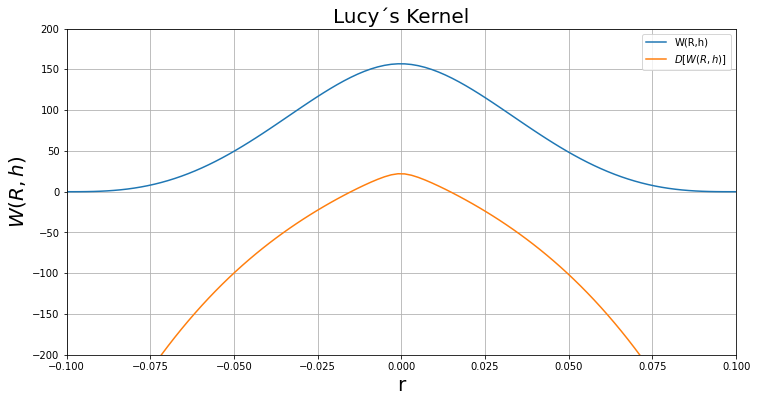

In [ ]:
#@markdown Grafica
plt.figure(figsize=(12,6))
rx, ry = np.linspace(-0.1,0.1,100), np.linspace(0,0.01,100)
plt.plot(rx, lucy(rx,ry), label = 'W(R,h)')
plt.plot(rx, misc.derivative(lucy2, p(rx,ry)), label = '$D[W(R, h)]$')
plt.xlim(-0.1,0.1)
plt.ylim(-200,200)
plt.xlabel(r"r",size=20)
plt.ylabel(r'$W(R,h)$', size=20)
plt.title('Lucy´s Kernel', size=20)
plt.grid()
plt.legend()
plt.show()

In [ ]:
#@markdown Derivada para $0\leq q < h$, respecto a q como variable independiente 

A, H, Q = sp.symbols('α'), sp.symbols('h'), sp.symbols('q')
a = 5/(np.pi*0.1)
func = sp.Derivative(a*(1+3*Q)*(1-Q**3)).doit()
f = A * (1+3*Q) * (1 - Q**3)
DEV  = sp.Derivative(f, Q).doit()
d_lucy = sp.lambdify(Q, func, 'numpy')
DEV


-3*q**2*α*(3*q + 1) + 3*α*(1 - q**3)

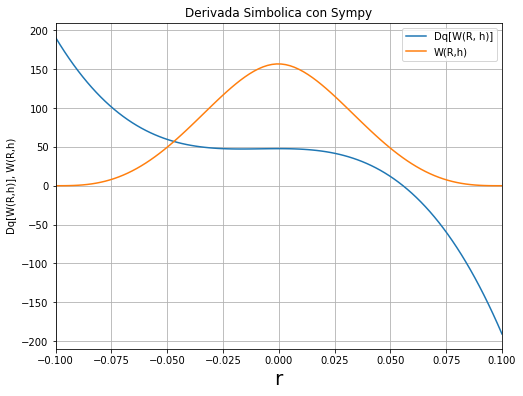

In [ ]:
#@markdown Derivada Simbolica con Sympy
r = np.linspace(-0.1,0.1,100)
plt.figure(figsize=(8,6))
plt.plot(r, d_lucy(r/0.1), label = 'Dq[W(R, h)]')
plt.plot(rx, lucy(rx,ry), label = 'W(R,h)')
plt.xlim(-0.1,0.1)
plt.xlabel('r', size=20)
plt.ylabel('Dq[W(R,h)], W(R,h)', size=10)
plt.title('Derivada Simbolica con Sympy')
plt.legend()
plt.grid()
plt.show()

De entrada hay una gran diferencia entre ambos resultados al derivar la misma función respecto a q. La primera parte con `scipy.misc.derivative`, para hacer la derivada numerica en cada punto a evaluar y en la segunda se halla la derivada simbolica general y en base a la expresión se procede al calculo con cada punto. Basados en la derivada realizada a mano, concordamos en que la expresión valida es la segunda, 




# 2.0 Integración

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson


3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

- 
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$


- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$


garantizando  que el error sea menor a $\varepsilon=1E-5$.  

###MÉTODO DEL TRAPECIO

\begin{equation}
\int_a^b f(x)dx = \frac{b-a}{2N}\left[f(a)+2 \sum_{i = 1}^{N-1} f(x_{i})+f(b)\right]-\frac{(b-a)^3}{12N^2}f''(\mu), \ for \ a<\mu<b
\end{equation}

###MÉTODO DE SIMPSON 

\begin{equation}
\int_a^b f(x)dx = \frac{b-a}{3N}\left[f(a)+2\sum_{i=1}^{\frac{N}{2}-1} f(x_{2i})+4\sum_{i=1}^{\frac{N}{2}} f(x_{2i-1})+f(b)\right] - \frac{(b-a)^5}{180N^5}f^{(4)}(\mu), \ for \ a<\mu<b
\end{equation}

###MÉTODO DE CUADRATURA

\begin{equation}
\int_a^b f(x)dx \approx \frac{1}{2}\sum_{i=0}^{N} \left(x_i - x_{i-1})(f(x_i)+f(x_{i-1})\right) \\ \\
\mathbf{\Delta X} = (x_1-x_0, x_2-x_1, x_3-x_2, ...,x_n-x_{n-1}) \\ \\
\mathbf\langle{F\rangle} = \frac{1}{2}\left(f(x_1)+f(x_0), f(x_2)+f(x_1),...,f(x_n)+f(x_{n-1})\right)  
\end{equation}

In [3]:
#@markdown Libs
from scipy import integrate
from scipy.misc import derivative as der

In [4]:
#@markdown **Definiendo Funciones**
x, y = sp.symbols('x'), sp.symbols('y')
inf = np.inf
fs1 = sp.exp(1-x**(1/2))
f1 = sp.lambdify(x, fs1, 'numpy')
fs2 = 1/(sp.sin(x)/sp.cos(x))**(1/2)
f2 = lambda x : 1/np.sqrt(np.tan(x))
fs3 = 1/(1+x**2)
f3 = sp.lambdify(x, fs3, 'numpy')
fs4 = 2*y*sp.sin(x)+(sp.cos(x))**2
f4 = sp.lambdify((x, y), fs4, 'numpy')
fs5 = 1/sp.log(x)
f5 = sp.lambdify(x, fs5, 'numpy')


In [5]:
#@markdown **Error** `int_err()`
def int_err(I, I_s, err = 1E-5 ):
  """
  I : approximation to integral of F
  I_s : Exact integral from sympy integration module
  err : error bound between integrals, default = 1E-5
  """
  if abs(I-I_s)<=err:
    return abs(I-I_s)
  else:
    return "error out of bound"


In [6]:
#@markdown ##**Integral por Metodo del trapecio $\int_{a}^{b} f$ `I_trapz()`**

def I_trapz(f, fs, a, b, N = 1000):
  X = np.linspace(a, b, N)
  x = sp.symbols('x')
  dx = (b-a)/N
  I  = np.trapz(f(X), dx = dx)
  I_s = sp.re(sp.N(sp.integrate(fs, (x, a, b))))
  return [I, (int_err(I, I_s))]


In [72]:
#@markdown $I_1, I_2 \rightarrow [I, I_{error}\leq1E-5]$
print(I_trapz(f1, fs1, 0, np.pi, N=1000000), '\n', I_trapz(f2, fs2, 1E-5, np.pi/2, N = 1000000))

[2.8754882630918512, 2.87234573281836e-6] 
 [2.215117944312895, 1.03055402789209e-6]


In [22]:
#@markdown $I_3 =  \int_{-\infty}^{\infty} f(x)dx = \int_{-\infty}^{\rho}f(x)dx$
#@markdown $+ \int_{\rho}^{\infty}f(x)dx  = 2\int_{0}^{1/\rho} t^{-2}f(1/t)dt$

ρ = 0.000001
F3 = lambda t : t**(-2) * (1/(1+(1/t)**2))
sympyI = sp.integrate(1/(1+x**2),(x,-inf,inf))
Ia = I_trapz(F3, fs3, 1E-8, 1/ρ, N=10000000)
I =[2*Ia[0], int_err(2*Ia[0], sympyI)]
I

[3.141590319464132, -3.14159031946413 + pi]

In [32]:
#@markdown **$I_4$ integrando primero en dx simbolicamente con `sympy.integrate` y luego en dy (Integral exacta)**

I_dx =sp.integrate(fs4, (x, sp.sin(x), sp.cos(x)))
I = sp.integrate(I_dx, (y, 0, np.pi/4))
sp.simplify(I)


-0.196349540849362*sin(2*sin(x)) + 0.196349540849362*sin(2*cos(x)) + 0.392699081698724*sqrt(2)*cos(x + pi/4) + 0.616850275068085*cos(sin(x)) - 0.616850275068085*cos(cos(x))

In [39]:
#@markdown $I_5$
I_trapz(f5, fs5, np.exp(1), 2*np.exp(1), N = 1000000)

[2.0038085578136506, 2.00381037362973e-6]

In [45]:
#@markdown ##**Integral por método de Simpson**
def simp(f, fs, a, b, N=1000):
  X = np.linspace(a, b, N+1)
  dx = (b-a)/N
  I = integrate.simps(f(X), dx = dx )
  I_s = sp.re(sp.N(sp.integrate(fs, (x, a, b))))
  return [I, int_err(I, I_s)]

In [55]:
#@markdown $I_1, I_2$
print(simp(f1, fs1, 0, np.pi, N = 1000000),'\n', simp(f2, fs2, 1E-5, np.pi/2, N = 1000000))

[2.8754911366664175, 1.22883347941638e-9] 
 [2.215116932799823, 1.90409554789994e-8]


In [56]:
#@markdown $I_3 =  \int_{-\infty}^{\infty} f(x)dx = \int_{-\infty}^{\rho}f(x)dx$
#@markdown $+ \int_{\rho}^{\infty}f(x)dx  = 2\int_{0}^{1/\rho} t^{-2}f(1/t)dt$

ρ = 0.000001
F3 = lambda t : t**(-2) * (1/(1+(1/t)**2))
sympyI = sp.integrate(1/(1+x**2),(x,-inf,inf))
Ia = simp(F3, fs3, 1E-8, 1/ρ, N=10000000)
I =[2*Ia[0], int_err(2*Ia[0], sympyI)]
I

[3.141590633589473, -3.14159063358947 + pi]

In [57]:
#@markdown $I_5$
simp(f5, fs5, np.exp(1), 2*np.exp(1), N = 1000000)

[2.0038105616240247, 4.44089209850063e-16]

In [63]:
#@markdown ##**Integral por Método de Cuadratura $\pm$ 1E-5 `(epsabs)`**
I1 = integrate.quad(f1, 0, np.pi, epsabs = 1E-5)
I2 = integrate.quad(f2, 0, np.pi/2, epsabs = 1E-5)
I3 = integrate.quad(f3, -inf, inf, epsabs = 1E-5)
I5 = integrate.quad(f5, np.exp(1), 2*np.exp(1), epsabs = 1E-5)
print('I1 : ', I1, '\nI2 : ',I2,'\nI3 : ',I3,'\nI5 : ', I5)

I1 :  (2.8754911354375863, 1.982119357535339e-09) 
I2 :  (2.221441469079092, 4.861437814085434e-06) 
I3 :  (3.141592653589793, 5.155583041103855e-10) 
I5 :  (2.0038105616240243, 2.2246766225020577e-14)


_____________________________________________________________
5. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all
resistance except gravity is neglected, the escape velocity v is given by

$$
v^2=2g\int_1 ^\infty z^{-2} dz,\ (Expresion \ correcta)
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity

In [78]:
#@markdown ##**Velocidad de Escape**
R = 6.378137*1E6 #Earth mean radius in meters
g = 9.82 # Gravitational acceleration in meters per second^2
f = lambda x  : (x/R)**(-2)*(1/R)
V = np.sqrt(2*g*integrate.quad(f, 1, inf)[0])
print(f'Scape velocity is V : {V} m/s')

Scape velocity is V : 11192.2567286495 m/s



6 Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:

\begin{equation}
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
\end{equation}

\begin{equation}
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
\end{equation}

6.2. Compute the relative error $\epsilon=|numerical-exact|/exact$ in each case. Present your data in the tabular form 
with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160

| N  |$\epsilon_T$ | $\epsilon_S$ | $\epsilon_G$ |
|----|---------------|--------------|--------------|
|   2  |...|...|...|
|   10  |...|...|...|

6.3. Make a log-log plot of relative errore versus. You should observe that 
$\epsilon\approx CN^{\alpha}$, $\mathrm{log} \epsilon =\alpha \mathrm{log}N + \mathrm{constant}$. This mean that a power-law dependence appears as a straight line on a log-log plot, and that if you use $\log_{10}$, the the ordinate on your log-log plot will be the negative of the numver of decimal places of presicion in your calculation.
6.4. Use your plot or table to stimate the power-law dependence of the error $\epsilon$ on the number of points N and to determine the number of decimal places of presicion in your calculation. Do this for both the trapezoid and simpsons rules and for both the algolrithmic and round-off error regimes. (Note that if may be hard to reach the round-off error regime for the trapezoid rule becasue the aproximation ) error is so large